In [1]:
# Stałe i dane — funkcje w src
import os
from src import (
    load_and_prepare_posner,
    posner_effect_stats,
    anova_hand_cue,
    block_effects,
    hand_cue_stats,
    plot_posner_effect,
    plot_block_dynamics,
    plot_blocks_violin,
    plot_hand_cue_interaction,
)

RESULTS_DIR = "results"
os.makedirs(RESULTS_DIR, exist_ok=True)

DATA_CSV = "data/475642_Posner_2026-01-09_15h25.34.801.csv"
df_correct = load_and_prepare_posner(DATA_CSV, verbose=True)

=== Rozkład typów wskazówek ===
cue_validity
valid      280
invalid    118
Name: count, dtype: int64

Udział trafnych wskazówek: 70.35%

=== Statystyki według bloków i typu wskazówki ===
                                  n_trials  mean_rt  std_rt  median_rt
block cue_validity response_type                                      
0.0   invalid      left                  9    0.225   0.043      0.225
                   right                 9    0.258   0.025      0.258
      valid        left                 20    0.222   0.068      0.225
                   right                20    0.216   0.037      0.209
1.0   invalid      left                  8    0.271   0.023      0.258
                   right                 9    0.277   0.036      0.275
      valid        left                 21    0.226   0.041      0.241
                   right                20    0.234   0.046      0.225
2.0   invalid      left                  7    0.247   0.033      0.242
                   right        

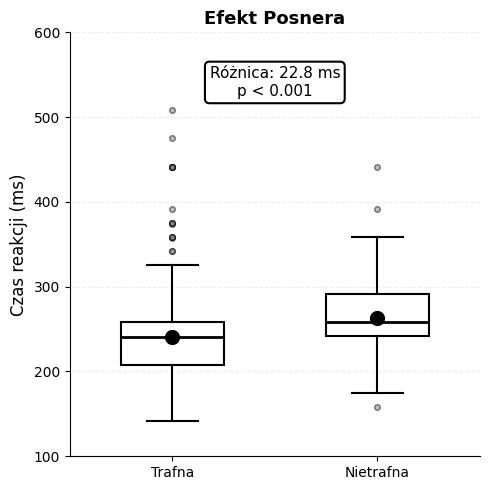


TABELA: Efekt Posnera - analiza statystyczna (Valid vs Invalid)
            Warunek   n M (ms) SD (ms) Median (ms) Min (ms) Max (ms)
     Trafna (valid) 280  240.4    54.8       241.0    141.5    508.5
Nietrafna (invalid) 118  263.2    41.2       258.2    157.9    441.6
            Różnica       22.8                                      

------------------------------------------------------------------------------------------
TEST STATYSTYCZNY (Welch's t-test):
------------------------------------------------------------------------------------------
t(289.3) = -4.547
p = 0.0000 ***
Cohen's d = 0.445
95% CI dla różnicy: [12.9, 32.6] ms
------------------------------------------------------------------------------------------

Wielkość efektu (Cohen's d = 0.445): średni
Efekt Posnera: 22.8 ms

✓ Tabela zapisana do pliku: results/tabela_efekt_posnera_glowny.csv


{'t': np.float64(-4.547152086225978),
 'p': np.float64(8.004105655081792e-06),
 'df_welch': np.float64(289.32081730531604),
 'cohens_d': np.float64(0.4452567952704806),
 'ci_lower': np.float64(0.0129196911745327),
 'ci_upper': np.float64(0.03263969593579189),
 'effect_ms': np.float64(22.779693555162297),
 'df_stats':                Warunek    n M (ms) SD (ms) Median (ms) Min (ms) Max (ms)
 0       Trafna (valid)  280  240.4    54.8       241.0    141.5    508.5
 1  Nietrafna (invalid)  118  263.2    41.2       258.2    157.9    441.6
 2              Różnica        22.8                                      }

In [2]:
# Wykres 1: Efekt Posnera (trafna vs nietrafna) + tabela statystyk
plot_posner_effect(df_correct, save_path=os.path.join(RESULTS_DIR, "figure1_clean.png"), show=True)
posner_effect_stats(df_correct, save_path=os.path.join(RESULTS_DIR, "tabela_efekt_posnera_glowny.csv"), verbose=True)


In [3]:
# ANOVA: ręka × typ wskazówki
anova_hand_cue(df_correct, verbose=True)

                                  sum_sq     df        F  PR(>F)
C(response_type)                  0.0000    1.0   0.0024  0.9612
C(cue_validity)                   0.0431    1.0  16.3818  0.0001
C(response_type):C(cue_validity)  0.0003    1.0   0.1056  0.7454
Residual                          1.0362  394.0      NaN     NaN

Interakcja ręka × wskazówka: p = 0.7454


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f1bb204eec0>,
 'anova_table':                                     sum_sq     df          F    PR(>F)
 C(response_type)                  0.000006    1.0   0.002364  0.961243
 C(cue_validity)                   0.043084    1.0  16.381752  0.000062
 C(response_type):C(cue_validity)  0.000278    1.0   0.105592  0.745392
 Residual                          1.036217  394.0        NaN       NaN,
 'interaction_p': np.float64(0.7453924952912526)}

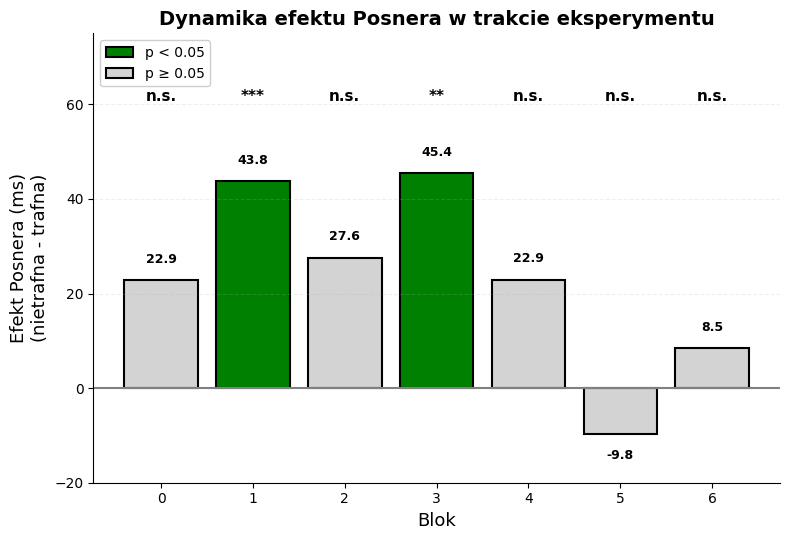


TABELA: Efekt Posnera według bloków - szczegółowa analiza statystyczna
 Blok  n trafne  n nietrafne  M trafne  M nietrafne  Efekt (ms)      t   df       p  Cohen's d Istotność
    0        40           18     218.6        241.5        22.9 -1.613 45.8  0.1123      0.458      n.s.
    1        41           17     230.1        273.9        43.8 -3.830 42.7 < 0.001      1.105       ***
    2        36           15     231.8        259.4        27.6 -1.862 42.6  0.0686      0.572      n.s.
    3        38           17     236.2        281.7        45.4 -3.431 24.6  0.0012      1.001        **
    4        41           18     263.1        286.0        22.9 -1.288 51.2  0.2031      0.364      n.s.
    5        42           17     245.5        235.7        -9.8  0.767 56.9  0.4465     -0.220      n.s.
    6        42           16     255.0        263.5         8.5 -0.559 39.2  0.5787      0.164      n.s.

Bloki z istotnym efektem (p < 0.05): [1, 3]
Bloki bez istotnego efektu (p ≥ 0.05): [0, 

,Blok,n_valid,n_invalid,M_valid,M_invalid,Efekt (ms),t,df,p,d,significant
0,0,40,18,218.636857,241.488161,22.851304,-1.613380,45.780944,0.112284,0.457915,False
1,1,41,17,230.124361,273.874694,43.750333,-3.829773,42.729681,0.000326,1.104767,True
2,2,36,15,231.821850,259.393060,27.571210,-1.862344,42.599129,0.068556,0.572332,False
3,3,38,17,236.227600,281.665559,45.437959,-3.430914,24.606775,0.001173,1.001094,True
4,4,41,18,263.074644,286.014817,22.940173,-1.287553,51.245829,0.203105,0.364052,False
5,5,42,17,245.471502,235.705794,-9.765708,0.766547,56.867078,0.446514,-0.220351,False
6,6,42,16,254.993371,263.534481,8.541110,-0.558604,39.167151,0.578659,0.164109,False


In [4]:
# Wykres 3: Dynamika efektu Posnera w blokach + tabela
plot_block_dynamics(df_correct, save_path=os.path.join(RESULTS_DIR, "figure3_block_dynamics.png"), show=True)
block_effects(df_correct, verbose=True, save_path=os.path.join(RESULTS_DIR, "tabela_efekt_bloki.csv"))


/home/ul/Desktop/UW/pracownia_eeg/posner-eeg-analysis/src/plots.py:219: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  blue_patch = Patch(
/home/ul/Desktop/UW/pracownia_eeg/posner-eeg-analysis/src/plots.py:222: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  red_patch = Patch(


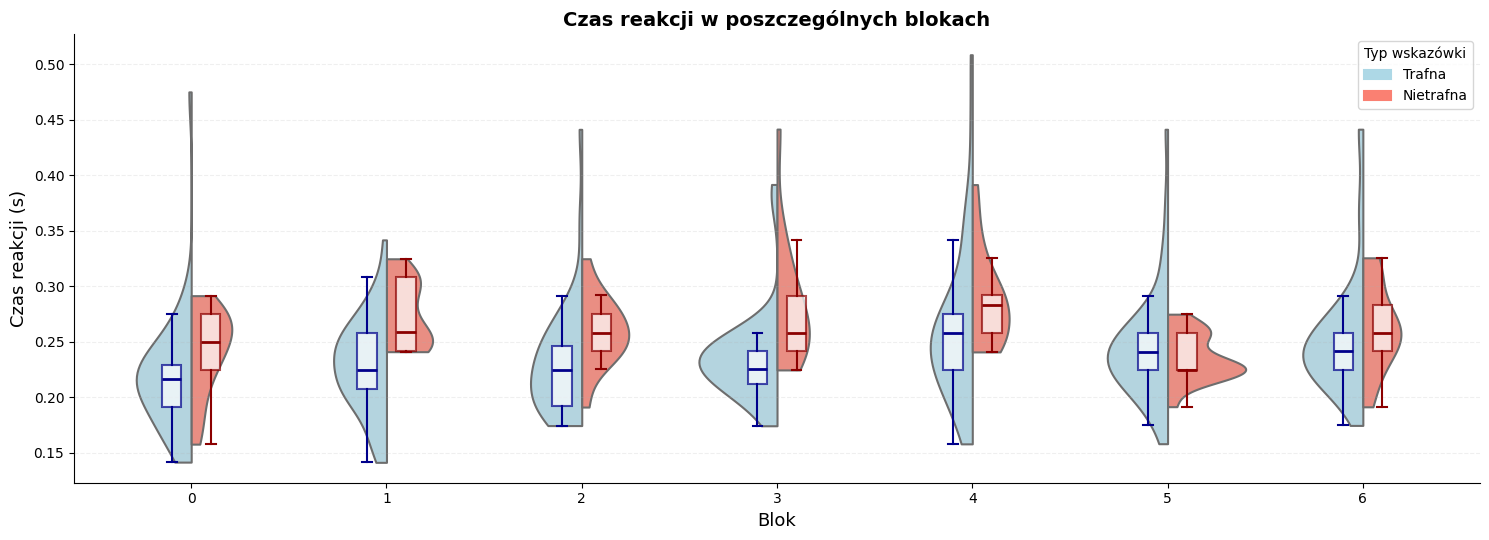


=== TABELA: Statystyki RT według bloków ===
                     n      M    SD  Median
block cue_validity                         
0.0   invalid       18  241.5  38.0   249.9
      valid         40  218.6  54.3   216.6
1.0   invalid       17  273.9  29.8   258.4
      valid         41  230.1  42.9   225.0
2.0   invalid       15  259.4  31.8   258.4
      valid         36  231.8  53.3   224.9
3.0   invalid       17  281.7  54.1   258.2
      valid         38  236.2  41.1   225.2
4.0   invalid       18  286.0  42.1   283.3
      valid         41  263.1  70.0   257.7
5.0   invalid       17  235.7  21.2   225.0
      valid         42  245.5  50.6   241.3
6.0   invalid       16  263.5  38.9   258.3
      valid         42  255.0  56.1   241.6

=== Efekt Posnera w każdym bloku ===
Blok 0: Efekt =  22.9 ms, t = -1.613, p = 0.1123 n.s.
Blok 1: Efekt =  43.8 ms, t = -3.830, p = 0.0003 ***
Blok 2: Efekt =  27.6 ms, t = -1.862, p = 0.0686 n.s.
Blok 3: Efekt =  45.4 ms, t = -3.431, p = 0.0012 **


In [5]:
# Wykres: RT według bloków i typu wskazówki (violin + boxplot)
plot_blocks_violin(df_correct, save_path=os.path.join(RESULTS_DIR, "figure_blocks_violin.png"), show=True)
# Statystyki RT według bloków (w konsoli)
import pandas as pd
from scipy import stats
block_stats = df_correct.groupby(['block', 'cue_validity']).agg(
    n=('rt_clean', 'count'),
    M=('rt_clean', lambda x: x.mean()*1000),
    SD=('rt_clean', lambda x: x.std()*1000),
    Median=('rt_clean', lambda x: x.median()*1000)
).round(1)
print("\n=== TABELA: Statystyki RT według bloków ===")
print(block_stats)
print("\n=== Efekt Posnera w każdym bloku ===")
for block in sorted(df_correct['block'].unique()):
    valid = df_correct[(df_correct['block']==block) & (df_correct['cue_validity']=='valid')]['rt_clean']*1000
    invalid = df_correct[(df_correct['block']==block) & (df_correct['cue_validity']=='invalid')]['rt_clean']*1000
    effect = invalid.mean() - valid.mean()
    t_stat, p_val = stats.ttest_ind(valid, invalid)
    from src.statistics import p_to_stars
    print(f"Blok {int(block)}: Efekt = {effect:5.1f} ms, t = {t_stat:6.3f}, p = {p_val:.4f} {p_to_stars(p_val)}")

/home/ul/Desktop/UW/pracownia_eeg/posner-eeg-analysis/src/plots.py:338: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  blue_patch = Patch(
/home/ul/Desktop/UW/pracownia_eeg/posner-eeg-analysis/src/plots.py:341: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  red_patch = Patch(


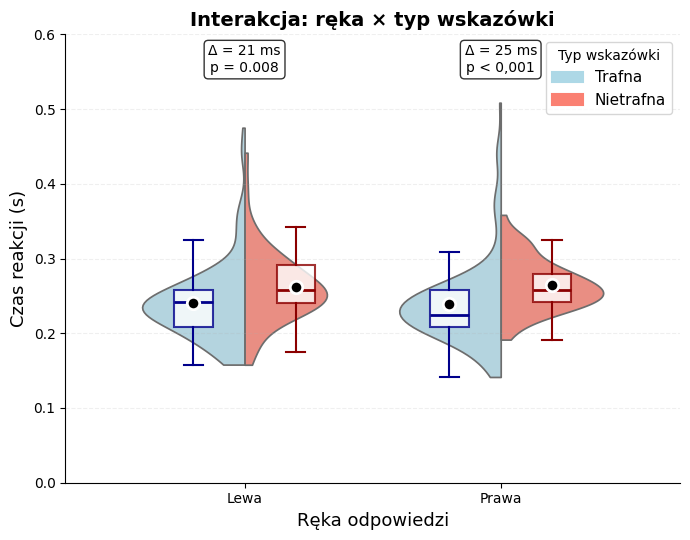


TABELA: Statystyki RT według ręki i typu wskazówki
                   n      M    SD  Median
Ręka  Wskazówka                          
Lewa  Trafna      58  262.0  48.0   258.2
      Nietrafna  141  241.0  52.3   241.3
Prawa Trafna      60  264.3  33.6   258.2
      Nietrafna  139  239.7  57.4   225.0

=== Efekt Posnera dla każdej ręki ===
Lewa : Efekt =  20.9 ms, t = -2.722, p = 0.0075 **
Prawa: Efekt =  24.6 ms, t = -3.769, p = 0.0002 ***

Interakcja ręka × wskazówka: F(1, 408) = 0.11, p = 0.7454 (brak interakcji)


In [6]:
# Wykres: Interakcja ręka × typ wskazówki + statystyki
plot_hand_cue_interaction(df_correct, save_path=os.path.join(RESULTS_DIR, "figure_hand_cue_interaction.png"), show=True)
hand_cue_stats(df_correct, verbose=True)
# ANOVA interakcji (powtórzenie dla spójności z raportem)
res = anova_hand_cue(df_correct, verbose=False)
interaction_p = res["interaction_p"]
interaction_f = res["anova_table"].loc["C(response_type):C(cue_validity)", "F"]
print(f"\nInterakcja ręka × wskazówka: F(1, 408) = {interaction_f:.2f}, p = {interaction_p:.4f} (brak interakcji)")